# 1- Tạo mạng điện

In [20]:
import pandapower as pp
import pandapower.shortcircuit as sc
import pandapower.plotting as plot
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#create empty net
x=np.array([1,3,10])
y=np.array([5,5,5])
net = pp.create_empty_network()

#create buses
bus1 = pp.create_bus(net, vn_kv=20., type="n", geodata=(x[0],y[0]), coords=[(x[0],y[0]),(x[0],y[0]),(x[0]+1.,y[0])], name="Bus 1")
bus2 = pp.create_bus(net, vn_kv=.40, type="b", geodata=(x[1],y[1]), coords=[(x[1]-1.,y[1]),(x[1],y[1]),(x[2]+1.,y[1])], name="Bus 2")
bus3 = pp.create_bus(net, vn_kv=.40, type="b", geodata=(x[2],y[2]), coords=[(x[2]-1.,y[2]),(x[2],y[2]),(x[2]+1.,y[2])], name="Bus 3")

#create bus elements
pp.create_ext_grid(net, bus=bus1, vm_pu=1.02, s_sc_max_mva=100, rx_max=0.1, s_sc_min_mva=80,rx_min=0.1, name="Grid Connection")
pp.create_load(net, bus=bus3, p_mw=0.100, q_mvar=0.05, name="Load")

#create branch elements
trafo = pp.create_transformer(net, hv_bus=bus1, lv_bus=bus2,tap_pos=0, std_type="0.4 MVA 20/0.4 kV", name="Trafo")
line = pp.create_line(net, from_bus=bus2, to_bus=bus3, length_km=0.1, std_type="NAYY 4x50 SE", name="Line")

#Create an closed switch at the load bus
pp.create_switch(net, bus=bus2, element=line, et="l", closed=True)
pp.create_switch(net, bus=bus3, element=line, et="l", closed=True)

1

In [25]:
# list of all bus indices & tuples of all bus coords
%matplotlib inline
%matplotlib notebook
buses = net.bus.index.tolist()
bus_names = net.bus.name.tolist()
coords = zip(net.bus_geodata.x.loc[buses].values+2, net.bus_geodata.y.loc[buses].values)

busname_col = plot.create_annotation_collection(size=.6, texts=np.char.mod('%s', bus_names), coords=coords, zorder=3, color="k")
bus_col = plot.create_bus_collection(net, color="b", size=0.1)
busbar_col = plot.create_busbar_collection(net, color="k", linewidths=2.)
trafo_col = plot.create_trafo_collection(net, color="k", size=0.5)
line_col = plot.create_line_collection(net, color="k", linewidths=3., use_bus_geodata=True)
ext_grid_col = plot.create_ext_grid_collection(net, size=0.75)
switch_col = plot.create_line_switch_collection(net, size=0.25, distance_to_bus=.25, use_line_geodata=True, zorder=12, color="k")
load_col = plot.create_load_collection(net, size=0.35)
plot.draw_collections([bus_col, busbar_col, trafo_col, line_col, ext_grid_col, switch_col, load_col, busname_col], figsize=(8, 6))
plt.show()

<IPython.core.display.Javascript object>

# 2- Xem lại cấu trúc dữ liệu được lưu trữ của mạng điện

In [3]:
#Parameters
print("\033[1m1- Dữ liệu các bus:\033[0m\n", net.bus)
print("\n\033[1m2- Dữ liệu các line:\033[0m\n", net.line)
print("\n\033[1m3- Dữ liệu các MBA:\033[0m\n", net.trafo)
print("\n\033[1m4- Dữ liệu các switch:\033[0m\n", net.switch)
print("\n\033[1m5- Dữ liệu các load:\033[0m\n", net.load)
print("\n\033[1m6- Dữ liệu các extenal grid:\033[0m\n", net.ext_grid)

1- Dữ liệu các bus:
     name  vn_kv type  zone  in_service
0  Bus 1   20.0    n  None        True
1  Bus 2    0.4    b  None        True
2  Bus 3    0.4    b  None        True

2- Dữ liệu các line:
    name      std_type  from_bus  to_bus  length_km  r_ohm_per_km  \
0  Line  NAYY 4x50 SE         1       2        0.1         0.642   

   x_ohm_per_km  c_nf_per_km  g_us_per_km  max_i_ka   df  parallel type  \
0         0.083        210.0          0.0     0.142  1.0         1   cs   

   in_service  
0        True  

3- Dữ liệu các MBA:
     name           std_type  hv_bus  lv_bus  sn_mva  vn_hv_kv  vn_lv_kv  \
0  Trafo  0.4 MVA 20/0.4 kV       0       1     0.4      20.0       0.4   

   vk_percent  vkr_percent  pfe_kw  ...  tap_neutral  tap_min tap_max  \
0         6.0        1.425    1.35  ...            0       -2       2   

   tap_step_percent  tap_step_degree  tap_pos  tap_phase_shifter  parallel  \
0               2.5              0.0        0              False         1   

   

# 3- Chạy phân bố công suất

In [4]:
#run a power flow with default parameters
pp.runpp(net, numba=False)

#check out at the results for buses, lines an transformers
print("\n\033[1m1- Dữ liệu các bus:\033[0m\n", net.res_bus)
print("\n\033[1m2- Dữ liệu các line:\033[0m\n", net.res_line)
print("\n\033[1m3- Dữ liệu các MBA:\033[0m\n", net.res_trafo)
print("\n\033[1m5- Dữ liệu các load:\033[0m\n", net.res_load)


1- Dữ liệu các bus:
       vm_pu  va_degree      p_mw    q_mvar
0  1.020000   0.000000 -0.107265 -0.052675
1  1.008843  -0.760126  0.000000  0.000000
2  0.964431   0.115859  0.100000  0.050000

2- Dữ liệu các line:
    p_from_mw  q_from_mvar  p_to_mw  q_to_mvar     pl_mw   ql_mvar  i_from_ka  \
0   0.105392     0.050696     -0.1      -0.05  0.005392  0.000696   0.167325   

    i_to_ka      i_ka  vm_from_pu  va_from_degree  vm_to_pu  va_to_degree  \
0  0.167326  0.167326    1.008843       -0.760126  0.964431      0.115859   

   loading_percent  
0       117.835208  

3- Dữ liệu các MBA:
     p_hv_mw  q_hv_mvar   p_lv_mw  q_lv_mvar     pl_mw   ql_mvar   i_hv_ka  \
0  0.107265   0.052675 -0.105392  -0.050696  0.001873  0.001979  0.003382   

    i_lv_ka  vm_hv_pu  va_hv_degree  vm_lv_pu  va_lv_degree  loading_percent  
0  0.167325      1.02           0.0  1.008843     -0.760126        29.289513  

5- Dữ liệu các load:
    p_mw  q_mvar
0   0.1    0.05


In [5]:
#lower the tap changer position, from position 0 to -1
net.trafo.tap_pos.at[trafo] = 5
pp.runpp(net, numba=False)

#check out at the results for buses, lines an transformers
print("\n\033[1m1- Dữ liệu các bus:\033[0m\n", net.res_bus)
print("\n\033[1m2- Dữ liệu các line:\033[0m\n", net.res_line)
print("\n\033[1m3- Dữ liệu các MBA:\033[0m\n", net.res_trafo)
print("\n\033[1m5- Dữ liệu các load:\033[0m\n", net.res_load)


1- Dữ liệu các bus:
       vm_pu  va_degree      p_mw    q_mvar
0  1.020000   0.000000 -0.108782 -0.053495
1  0.893949  -0.980141  0.000000  0.000000
2  0.843106   0.150718  0.100000  0.050000

2- Dữ liệu các line:
    p_from_mw  q_from_mvar  p_to_mw  q_to_mvar     pl_mw   ql_mvar  i_from_ka  \
0   0.107056     0.050911     -0.1      -0.05  0.007056  0.000911   0.191404   

    i_to_ka      i_ka  vm_from_pu  va_from_degree  vm_to_pu  va_to_degree  \
0  0.191404  0.191404    0.893949       -0.980141  0.843106      0.150718   

   loading_percent  
0       134.791896  

3- Dữ liệu các MBA:
     p_hv_mw  q_hv_mvar   p_lv_mw  q_lv_mvar     pl_mw   ql_mvar   i_hv_ka  \
0  0.108782   0.053495 -0.107056  -0.050911  0.001726  0.002584  0.003431   

    i_lv_ka  vm_hv_pu  va_hv_degree  vm_lv_pu  va_lv_degree  loading_percent  
0  0.191404      1.02           0.0  0.893949     -0.980141         33.15213  

5- Dữ liệu các load:
    p_mw  q_mvar
0   0.1    0.05


# 4- Tính toán ngắn mạch

In [6]:
#calculate a three phase short circuit current with a fault impedance of 2 Ohms
#max mode
sc.calc_sc(net, case="max", ip=True, r_fault_ohm=2.)
#check out at the results for buses, lines an transformers
print("\n\033[1m1- Dữ liệu dòng ngắn mạch cực đại các bus:\033[0m\n", net.res_bus_sc)

#min mode
net.line["endtemp_degree"] = 80
sc.calc_sc(net, case="min", ip=True, ith=True, r_fault_ohm=2.)
#check out at the results for buses, lines an transformers
print("\n\033[1m1- Dữ liệu dòng ngắn mạch cực tiểu các bus:\033[0m\n", net.res_bus_sc)


1- Dữ liệu dòng ngắn mạch cực đại các bus:
     ikss_ka    skss_mw     ip_ka    rk_ohm    xk_ohm
0  2.534707  87.804824  4.317318  2.437816  4.378164
1  0.126631   0.087733  0.182666  2.005930  0.025290
2  0.122698   0.085008  0.176991  2.070130  0.033590

1- Dữ liệu dòng ngắn mạch cực tiểu các bus:
     ikss_ka    skss_mw     ip_ka    ith_ka    rk_ohm    xk_ohm
0  2.074235  71.853625  3.629695  2.081434  2.497519  4.975186
1  0.109362   0.075768  0.157755  0.109502  2.005954  0.025529
2  0.105182   0.072872  0.151725  0.105317  2.085562  0.033829


# 5- Trực quan hoá dòng tải các nhánh và điện áp các nút

## Continuous Colormaps

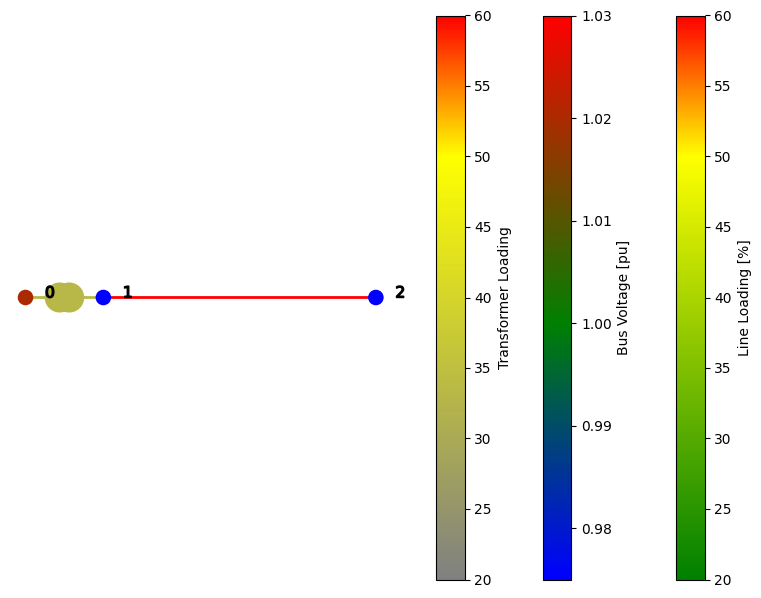

In [7]:
cmap_list=[(0.975, "blue"), (1.0, "green"), (1.03, "red")]
cmap, norm = plot.cmap_continuous(cmap_list)
bc = plot.create_bus_collection(net, net.bus.index, size=.2, zorder=2, cmap=cmap, norm=norm)

cmap_list=[(20, "green"), (50, "yellow"), (60, "r")]
cmap, norm = plot.cmap_continuous(cmap_list)
lc = plot.create_line_collection(net, net.line.index, use_bus_geodata= True, zorder=1, cmap=cmap, norm=norm, linewidths=2)

cmap_list=[(20, "grey"), (50, "yellow"), (60, "r")]
cmap, norm = plot.cmap_continuous(cmap_list)
tc = plot.create_trafo_collection(net, net.trafo.index, zorder=1, color="k", size=0.35, cmap=cmap, norm=norm)

buses = net.bus.index.tolist()
coords = zip(net.bus_geodata.x.loc[buses].values+.5, net.bus_geodata.y.loc[buses].values)
bic = plot.create_annotation_collection(size=.4, texts=np.char.mod('%s', buses), coords=coords, zorder=3, color="k")

plot.draw_collections([lc, bc, tc, bic], figsize=(8,6))
pylab.show()

## Discrete Colormaps

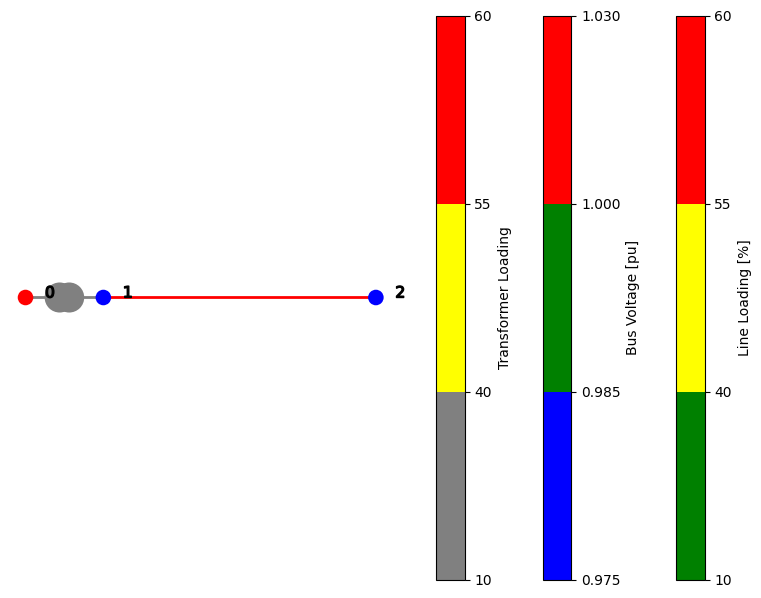

In [8]:
cmap_list=[((0.975, 0.985), "blue"), ((0.985, 1.0), "green"), ((1.0, 1.03), "red")]
cmap, norm = plot.cmap_discrete(cmap_list)
bc = plot.create_bus_collection(net, net.bus.index, size=.2, zorder=2, cmap=cmap, norm=norm)

cmap_list=[((10, 40), "green"), ((40, 55), "yellow"), ((55, 60), "red")]
cmap, norm = plot.cmap_discrete(cmap_list)
lc = plot.create_line_collection(net, net.line.index, use_bus_geodata=True, zorder=1, cmap=cmap, norm=norm, linewidths=2)

cmap_list=[((10, 40), "grey"), ((40, 55), "yellow"), ((55, 60), "red")]
cmap, norm = plot.cmap_discrete(cmap_list)
tc = plot.create_trafo_collection(net, net.trafo.index, zorder=1, color="k", size=0.35, cmap=cmap, norm=norm)

buses = net.bus.index.tolist()
coords = zip(net.bus_geodata.x.loc[buses].values+.5, net.bus_geodata.y.loc[buses].values)
bic = plot.create_annotation_collection(size=.4, texts=np.char.mod('%s', buses), coords=coords, zorder=3, color="k")

plot.draw_collections([lc, bc, tc, bic ], figsize=(8,6))
pylab.show()